# 20 News Groups
### Juan Esteban Arboleda
### Luccas Rojas

# 1. Clasificador NB y LR

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_predict, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

* Se debe cambiar PATH_20news con la carpeta de todos los news o el PATH_FINAL_20NEWS con el txt de los 20 news que carga un dataframe ya hecho con antetioridad.

In [2]:
PATH_20NEWS = '../data/20news-18828'
PATH_FINAL_20NEWS = "../data/final_20news.txt"

def load_news(documents_path: str):
    """
    Creates a DataFrame with two columns: 'text' and 'folder_name'.
    Params:
    -------
        documents_path: path to the folder with the documents
    Returns:
    -------
        A DataFrame with text and folder_name columns.
    """
    data = {'text': [], 'category': []}
    
    for folder in os.listdir(documents_path):
        for document_file in os.listdir(os.path.join(documents_path, folder)):
            with open(os.path.join(documents_path, folder, document_file), "r") as document:
                text = document.read()
                data['text'].append(text)
                data['category'].append(folder)
    
    return pd.DataFrame(data)

# load_news() should only be called if the PATH_FINAL_NEWS does not
# exist yet.
if not os.path.isfile(PATH_FINAL_20NEWS):
    df = load_news(PATH_20NEWS)
    df.to_csv(PATH_FINAL_20NEWS, index=False)

# Load the DataFrame from the CSV file if it already exists
news_idf = pd.read_csv(PATH_FINAL_20NEWS)

In [3]:
news_idf

,text,category
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism
...,...,...
18823,From: sbuckley@fraser.sfu.ca (Stephen Buckley)...,talk.religion.misc
18824,From: bakerj@gtephx.UUCP (Jon Baker)\nSubject:...,talk.religion.misc
18825,From: pharvey@quack.kfu.com (Paul Harvey)\nSub...,talk.religion.misc
18826,From: <KEVXU@CUNYVM.BITNET>\nSubject: Re: Info...,talk.religion.misc


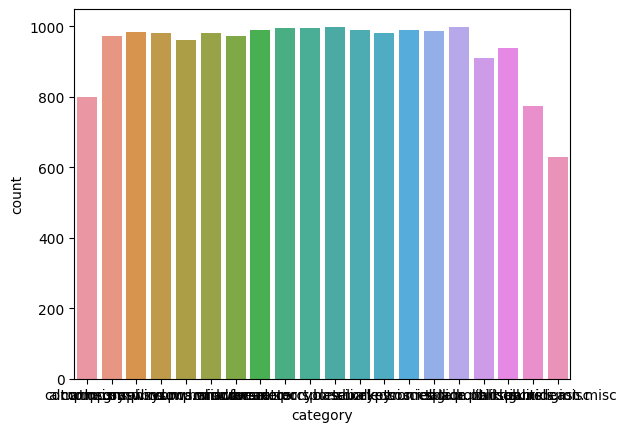

In [4]:
ax = sns.countplot(x="category", data=news_idf)

In [5]:
X = news_idf['text']
y = news_idf['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/7, random_state=42)

In [6]:
lr_pipeline_tf_idf = Pipeline(
    steps=[('vectorize', TfidfVectorizer(stop_words='english',lowercase=True)), 
           ('model', LogisticRegression())
    ]
)

lr_pipeline_bow = Pipeline(
    steps=[('vectorize', CountVectorizer(stop_words='english',lowercase=True)), 
           ('model', LogisticRegression())
    ]
)

In [7]:
model_name = 'lr_pipeline_tf_idf'
if not os.path.isfile(f'../data/{model_name}.joblib'):
    lr_pipeline_tf_idf.fit(X_train, y_train)
    joblib.dump(lr_pipeline_tf_idf, f'../data/{model_name}.joblib')
else:
    lr_pipeline_tf_idf = joblib.load(f'../data/{model_name}.joblib')

In [8]:
model_name = 'lr_pipeline_bow'
if not os.path.isfile(f'../data/{model_name}.joblib'):
    lr_pipeline_bow.fit(X_train, y_train)
    joblib.dump(lr_pipeline_bow, f'../data/{model_name}.joblib')
else:
    lr_pipeline_bow = joblib.load(f'../data/{model_name}.joblib')

In [9]:
y_pred_lr_tf_idf = lr_pipeline_tf_idf.predict(X_test)

print(classification_report(y_test, y_pred_lr_tf_idf))

                          precision    recall  f1-score   support

             alt.atheism       0.87      0.89      0.88       220
           comp.graphics       0.79      0.84      0.82       303
 comp.os.ms-windows.misc       0.78      0.84      0.81       280
comp.sys.ibm.pc.hardware       0.79      0.80      0.80       286
   comp.sys.mac.hardware       0.85      0.89      0.87       275
          comp.windows.x       0.89      0.84      0.86       300
            misc.forsale       0.83      0.86      0.85       287
               rec.autos       0.92      0.91      0.92       302
         rec.motorcycles       0.97      0.97      0.97       317
      rec.sport.baseball       0.96      0.96      0.96       300
        rec.sport.hockey       0.97      0.97      0.97       297
               sci.crypt       0.97      0.93      0.95       297
         sci.electronics       0.86      0.86      0.86       318
                 sci.med       0.94      0.95      0.94       295
         

In [10]:
y_pred_lr_bow = lr_pipeline_bow.predict(X_test)

print(classification_report(y_test, y_pred_lr_bow))

                          precision    recall  f1-score   support

             alt.atheism       0.86      0.86      0.86       220
           comp.graphics       0.80      0.81      0.80       303
 comp.os.ms-windows.misc       0.81      0.85      0.83       280
comp.sys.ibm.pc.hardware       0.78      0.75      0.76       286
   comp.sys.mac.hardware       0.83      0.86      0.84       275
          comp.windows.x       0.89      0.84      0.87       300
            misc.forsale       0.80      0.87      0.84       287
               rec.autos       0.89      0.91      0.90       302
         rec.motorcycles       0.96      0.95      0.95       317
      rec.sport.baseball       0.93      0.92      0.92       300
        rec.sport.hockey       0.96      0.96      0.96       297
               sci.crypt       0.95      0.93      0.94       297
         sci.electronics       0.83      0.85      0.84       318
                 sci.med       0.91      0.94      0.92       295
         

In [11]:
nb_pipeline_tf_idf = Pipeline(
    steps=[('vectorize', TfidfVectorizer(stop_words='english',lowercase=True)), 
           ('model', MultinomialNB())
    ]
)

nb_pipeline_bow = Pipeline(
    steps=[('vectorize', CountVectorizer(stop_words='english',lowercase=True)), 
           ('model', MultinomialNB())
    ]
)

In [12]:
model_name = 'nb_pipeline_tf_idf'
if not os.path.isfile(f'../data/{model_name}.joblib'):
    nb_pipeline_tf_idf.fit(X_train, y_train)
    joblib.dump(nb_pipeline_tf_idf, f'../data/{model_name}.joblib')
else:
    nb_pipeline_tf_idf = joblib.load(f'../data/{model_name}.joblib')

In [13]:
model_name = 'nb_pipeline_bow'
if not os.path.isfile(f'../data/{model_name}.joblib'):
    nb_pipeline_bow.fit(X_train, y_train)
    joblib.dump(nb_pipeline_bow, f'../data/{model_name}.joblib')
else:
    nb_pipeline_bow = joblib.load(f'../data/{model_name}.joblib')

In [14]:
y_pred_nb_tf_idf = nb_pipeline_tf_idf.predict(X_test)

print(classification_report(y_test, y_pred_nb_tf_idf))

                          precision    recall  f1-score   support

             alt.atheism       0.85      0.87      0.86       220
           comp.graphics       0.89      0.79      0.84       303
 comp.os.ms-windows.misc       0.80      0.86      0.83       280
comp.sys.ibm.pc.hardware       0.73      0.84      0.78       286
   comp.sys.mac.hardware       0.84      0.92      0.88       275
          comp.windows.x       0.95      0.86      0.90       300
            misc.forsale       0.93      0.77      0.84       287
               rec.autos       0.91      0.92      0.91       302
         rec.motorcycles       0.97      0.98      0.97       317
      rec.sport.baseball       0.97      0.93      0.95       300
        rec.sport.hockey       0.91      0.99      0.95       297
               sci.crypt       0.86      0.97      0.91       297
         sci.electronics       0.94      0.77      0.85       318
                 sci.med       0.98      0.94      0.96       295
         

In [15]:
y_pred_nb_bow = nb_pipeline_bow.predict(X_test)

print(classification_report(y_test, y_pred_nb_bow))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.93      0.87       220
           comp.graphics       0.72      0.88      0.79       303
 comp.os.ms-windows.misc       0.97      0.31      0.47       280
comp.sys.ibm.pc.hardware       0.67      0.85      0.75       286
   comp.sys.mac.hardware       0.78      0.91      0.84       275
          comp.windows.x       0.76      0.89      0.82       300
            misc.forsale       0.91      0.74      0.82       287
               rec.autos       0.94      0.93      0.93       302
         rec.motorcycles       0.98      0.97      0.97       317
      rec.sport.baseball       0.99      0.95      0.97       300
        rec.sport.hockey       0.95      0.97      0.96       297
               sci.crypt       0.91      0.95      0.93       297
         sci.electronics       0.93      0.82      0.87       318
                 sci.med       0.97      0.94      0.95       295
         

# 2. Cross-validation

In [16]:
partitions = KFold(n_splits=10, shuffle=True, random_state = 0)
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [17]:
lr_pipeline = Pipeline(
    steps=[('vectorize', TfidfVectorizer(stop_words='english',lowercase=True)), 
           ('model', LogisticRegression())
    ]
)

nb_pipeline = Pipeline(
    steps=[('vectorize', TfidfVectorizer(stop_words='english',lowercase=True)), 
           ('model', MultinomialNB())
    ]
)

Grid Search Regresion Lineal

In [18]:
params_logreg = { 'model__C': [ 0.1,1,10] }
lr_model = GridSearchCV(lr_pipeline, params_logreg, cv=partitions, n_jobs=-1)
lr_model.fit(X_train, y_train)

score = lr_model.score(X_test, y_test)
print("Score:", score)
print("Best params:", lr_model.best_params_)

c:\Users\luccas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.9215790405381483
Best params: {'model__C': 10}


In [19]:
y_pred_lr = lr_model.predict(X_test)
print("precision_score:", precision_score(y_test, y_pred_lr, average='macro'))
print("recall_score:", recall_score(y_test, y_pred_lr, average='macro'))
print("f1_macro:", f1_score(y_test, y_pred_lr, average='macro'))
print("f1_micro:", f1_score(y_test, y_pred_lr, average='micro'))
print(classification_report(y_test, y_pred_lr))
joblib.dump(lr_model, '../data/lr_model.joblib')

precision_score: 0.9215582782496892
recall_score: 0.9182266793756046
f1_macro: 0.9193161533571594
f1_micro: 0.9215790405381483
                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.90       220
           comp.graphics       0.85      0.87      0.86       303
 comp.os.ms-windows.misc       0.83      0.88      0.85       280
comp.sys.ibm.pc.hardware       0.81      0.81      0.81       286
   comp.sys.mac.hardware       0.90      0.91      0.90       275
          comp.windows.x       0.91      0.88      0.89       300
            misc.forsale       0.85      0.92      0.88       287
               rec.autos       0.94      0.94      0.94       302
         rec.motorcycles       0.98      0.97      0.98       317
      rec.sport.baseball       0.98      0.97      0.98       300
        rec.sport.hockey       0.98      0.97      0.98       297
               sci.crypt       0.99      0.95      0.97       297
         sci.e

['../data/lr_model.joblib']

Grid Search Naive Bayes


In [20]:
predicted = cross_val_predict(nb_pipeline, X_train, y_train, cv= 10, n_jobs=-1)

In [21]:
report = classification_report(y_train, predicted, output_dict=True)
report

{'alt.atheism': {'precision': 0.8657718120805369,
  'recall': 0.8911917098445595,
  'f1-score': 0.8782978723404254,
  'support': 579},
 'comp.graphics': {'precision': 0.8828382838283828,
  'recall': 0.7985074626865671,
  'f1-score': 0.8385579937304075,
  'support': 670},
 'comp.os.ms-windows.misc': {'precision': 0.8160315374507228,
  'recall': 0.8808510638297873,
  'f1-score': 0.8472032742155526,
  'support': 705},
 'comp.sys.ibm.pc.hardware': {'precision': 0.7515527950310559,
  'recall': 0.8692528735632183,
  'f1-score': 0.8061292471685542,
  'support': 696},
 'comp.sys.mac.hardware': {'precision': 0.9169184290030211,
  'recall': 0.8848396501457726,
  'f1-score': 0.900593471810089,
  'support': 686},
 'comp.windows.x': {'precision': 0.9244992295839753,
  'recall': 0.8823529411764706,
  'f1-score': 0.9029345372460497,
  'support': 680},
 'misc.forsale': {'precision': 0.9219015280135824,
  'recall': 0.7927007299270074,
  'f1-score': 0.8524332810047096,
  'support': 685},
 'rec.autos': {

In [22]:
print(report.keys())
print(report["accuracy"])

print("precision_score:"+str(report["macro avg"]["precision"]))
print("recall_score:"+str(report["macro avg"]["recall"]))
print("f1_macro:"+str(report["macro avg"]["f1-score"]))
# print("f1_micro:"+str(report["micro avg"]["f1-score"]))

dict_keys(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc', 'accuracy', 'macro avg', 'weighted avg'])
0.8859549282950148
precision_score:0.8958206008318246
recall_score:0.8743328335705005
f1_macro:0.8731274052742443


# 3. Evaluacion de los modelos

In [28]:
y_pred_lr = lr_model.predict(X_test)
print("precision_score:", precision_score(y_test, y_pred_lr, average='macro'))
print("recall_score:", recall_score(y_test, y_pred_lr, average='macro'))
print("f1_macro:", f1_score(y_test, y_pred_lr, average='macro'))
print("f1_micro:", f1_score(y_test, y_pred_lr, average='micro'))

precision_score: 0.9215582782496892
recall_score: 0.9182266793756046
f1_macro: 0.9193161533571594
f1_micro: 0.9215790405381483


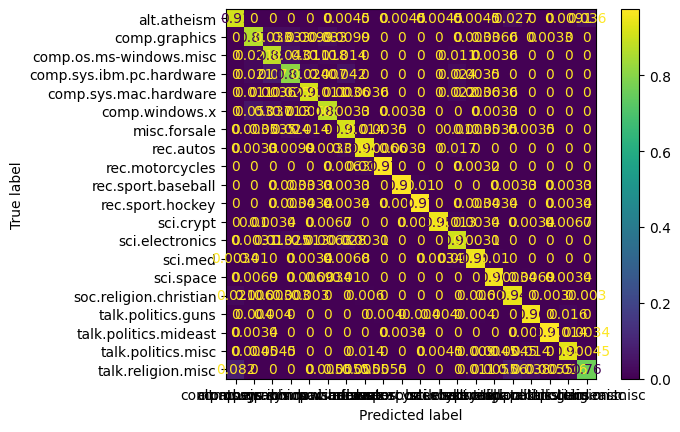

In [35]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr,normalize='true')

In [26]:
nb_model = nb_pipeline_tf_idf
y_pred_nb = nb_model.predict(X_test)
print("precision_score:", precision_score(y_test, y_pred_nb, average='macro'))
print("recall_score:", recall_score(y_test, y_pred_nb, average='macro'))
print("f1_macro:", f1_score(y_test, y_pred_nb, average='macro'))
print("f1_micro:", f1_score(y_test, y_pred_nb, average='micro'))

precision_score: 0.8921136847279326
recall_score: 0.8688881772534041
f1_macro: 0.8672621347276926
f1_micro: 0.8813949371570189


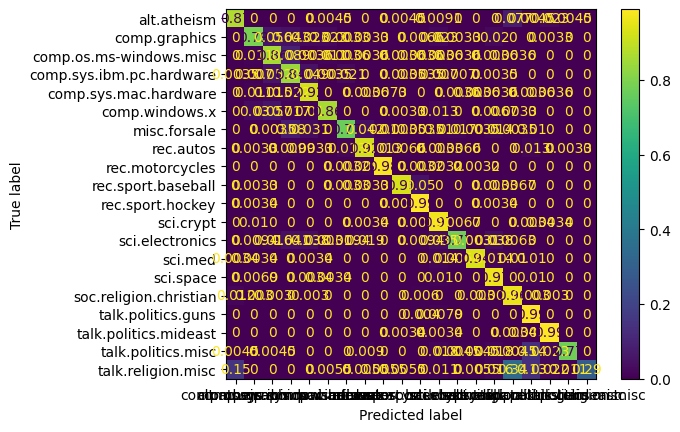

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb,normalize='true')